In this lecture, we continue with our discussion on model selection and evaluation. Specifically, we focus on different methods of drawing samples when it comes to cross validation. The following sections list utilities to generate indices that can be used to generate dataset splits according to different cross validation strategies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import TimeSeriesSplit

%matplotlib inline

In [2]:
os.chdir("C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\Introduction to Data Science Using Python\\datasets")

The most simple CV method is the K-fold CV which is applicable in i.i.d. data (all samples stem from the same generative process and that the generative process is assumed to have no memory of past generated samples). The KFold() function divides all the samples in K groups of samples, called folds (if K=n, then it is equivalent to the leave-one-out strategy), of equal sizes (if possible). The prediction function is learned using K-1 folds, and the fold left out is used for test. The 'n_splits' argument determines the number of folds (it must be no less than 2).

Below is an example of using the KFold() function. We want to do a 3-fold CV here. The split() method will hand us the indices for the training and test data. As we see, the train-test split is given in the following way:

    Train vs. Test:
    First split: ['c','d','e'] vs. ['a','b']
    Second split: ['a', 'b', 'e'] vs. ['c', 'd']
    Third split: ['a', 'b', 'c', 'd'] vs. ['e']

In [3]:
data = ["a", "b", "c", "d", "e"]
kf = KFold(n_splits=3, random_state=123) # 3-folds CV
print(type(kf))
for train, test in kf.split(data):
    print('Indices for Training Data: ', train)
    print('Indices for Test Data: ', test)

<class 'sklearn.model_selection._split.KFold'>
Indices for Training Data:  [2 3 4]
Indices for Test Data:  [0 1]
Indices for Training Data:  [0 1 4]
Indices for Test Data:  [2 3]
Indices for Training Data:  [0 1 2 3]
Indices for Test Data:  [4]


Now let's suppose are using this splitting scheme on a numpy array object. Suppose we are in the supervised learning world. The dataset is composed of the X-portion (covariates) and the y-portion (outcome), denoted by X and y respectively. X is 5-by-2 in dimension and y is 5-by-1 in dimension (so n=5 here is the sample size). Using the KFold() method, we can achieve the following training and test set split. Notice that in the last iteration of the KFold() results, our indices are [0,1,2,3] for the training data and [4] for the testing, therefore, applying these indices, we obtain the following datasets:

In [4]:
X = np.array([[0.00, 0.00], [1.05, 2.56], [-1.08, -1.53], [2.43, 2.43], [0.78, 9.53]])
y = np.array([0.45, 1,22, 0.98, 7.54, 5.36])
print('X: ', '\n', X)
print('y:', '\n', y)
print('-------------------------')

X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
print('X_train:\n', X_train)
print('X_test:\n', X_test)
print('y_train:', y_train)
print('y_test:', y_test)

X:  
 [[ 0.    0.  ]
 [ 1.05  2.56]
 [-1.08 -1.53]
 [ 2.43  2.43]
 [ 0.78  9.53]]
y: 
 [ 0.45  1.   22.    0.98  7.54  5.36]
-------------------------
X_train:
 [[ 0.    0.  ]
 [ 1.05  2.56]
 [-1.08 -1.53]
 [ 2.43  2.43]]
X_test:
 [[0.78 9.53]]
y_train: [ 0.45  1.   22.    0.98]
y_test: [7.54]


The leave-one-out cross validation (LOOCV) is a special case of K-fold CV. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for  samples, we have  different training sets and  different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set:

In [5]:
X = np.array([[0.00, 0.00], [1.05, 2.56], [-1.08, -1.53], [2.43, 2.43], [0.78, 9.53], [23.21,-1.09]])
y = np.array([0.45, 1,22, 0.98, 7.54, 5.36,-8.63])
loo = LeaveOneOut()
print(type(loo))
for train, test in loo.split(X):
    print('Indices for Training Data: ', train)
    print('Indices for Test Data: ', test)
print('...............')
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
print('X_train:\n', X_train)
print('X_test:\n', X_test)
print('y_train:', y_train)
print('y_test:', y_test)

<class 'sklearn.model_selection._split.LeaveOneOut'>
Indices for Training Data:  [1 2 3 4 5]
Indices for Test Data:  [0]
Indices for Training Data:  [0 2 3 4 5]
Indices for Test Data:  [1]
Indices for Training Data:  [0 1 3 4 5]
Indices for Test Data:  [2]
Indices for Training Data:  [0 1 2 4 5]
Indices for Test Data:  [3]
Indices for Training Data:  [0 1 2 3 5]
Indices for Test Data:  [4]
Indices for Training Data:  [0 1 2 3 4]
Indices for Test Data:  [5]
...............
X_train:
 [[ 0.    0.  ]
 [ 1.05  2.56]
 [-1.08 -1.53]
 [ 2.43  2.43]
 [ 0.78  9.53]]
X_test:
 [[23.21 -1.09]]
y_train: [ 0.45  1.   22.    0.98  7.54]
y_test: [5.36]


Now let's move onto some CV schemes that are fancier than K-fold CV and LOOCV. As an example, the ShuffleSplit() iterator will generate a user-defined number of independent train-test dataset splits. Samples are first shuffled and then split into a pair of train and test sets. It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number generator.

In [6]:
ss = ShuffleSplit(n_splits=5, test_size=0.25,random_state=0)
for train, test in ss.split(X):
    print('Indices for Training Data: ', train)
    print('Indices for Test Data: ', test)
print('...............')
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
print('X_train:\n', X_train)
print('X_test:\n', X_test)
print('y_train:', y_train)
print('y_test:', y_test)

Indices for Training Data:  [1 3 0 4]
Indices for Test Data:  [5 2]
Indices for Training Data:  [4 0 2 5]
Indices for Test Data:  [1 3]
Indices for Training Data:  [1 2 4 0]
Indices for Test Data:  [3 5]
Indices for Training Data:  [3 4 1 0]
Indices for Test Data:  [5 2]
Indices for Training Data:  [3 5 1 0]
Indices for Test Data:  [2 4]
...............
X_train:
 [[ 2.43  2.43]
 [23.21 -1.09]
 [ 1.05  2.56]
 [ 0.    0.  ]]
X_test:
 [[-1.08 -1.53]
 [ 0.78  9.53]]
y_train: [0.98 5.36 1.   0.45]
y_test: [22.    7.54]


Let's see another CV scheme. Some binary classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling as implemented in StratifiedKFold() and StratifiedShuffleSplit() to ensure that relative class frequencies is approximately preserved in each train and validation fold. StratifiedKFold() is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set. In a similar fashion, StratifiedShuffleSplit() is a variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set.

Here is an example of stratified 3-fold cross-validation on a dataset with 10 samples from two slightly unbalanced classes:

In [7]:
X = np.ones(10) # X is a list of ones with a length of 10
y = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))

[1 2 6 7 8 9] [0 3 4 5]
[0 2 3 4 5 8 9] [1 6 7]
[0 1 3 4 5 6 7] [2 8 9]


So far, we have talked about balanced and imbalanced data. But these are all wrapped under the umbrellla of the i.i.d. assumption. In many real world problems, the i.i.d assumption may not be realistic. The i.i.d. assumption is broken if the underlying generative process yield groups of dependent samples. Such a grouping of data is domain specific. An example would be when there is medical data collected from multiple patients, with multiple samples taken from each patient. And such data is likely to be dependent on the individual group. In our example, the patient id for each sample will be its group identifier.

In this case we would like to know if a model trained on a particular set of groups generalizes well to the unseen groups. To measure this, we need to ensure that all the samples in the validation fold come from groups that are not represented at all in the paired training fold. The following cross-validation splitters can be used to do that. The grouping identifier for the samples is specified via the 'groups' parameter.

GroupKFold() is a variation of k-fold which ensures that the same group is not represented in both testing and training sets. For example if the data is obtained from different subjects with several samples per-subject and if the model is flexible enough to learn from highly person specific features it could fail to generalize to new subjects. GroupKFold() makes it possible to detect this kind of overfitting situations.

Imagine you have three subjects, each with an associated number from 1 to 3: each subject is in a different testing fold, and the same subject is never in both testing and training. Notice that the folds do not have exactly the same size due to the imbalance in the data. Below gives the results and the visualizations of the CV:

In [8]:
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]
gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(X, y, groups=groups):
    print('Indices for Training Data: ', train)
    print('Indices for Test Data: ', test)

Indices for Training Data:  [0 1 2 3 4 5]
Indices for Test Data:  [6 7 8 9]
Indices for Training Data:  [0 1 2 6 7 8 9]
Indices for Test Data:  [3 4 5]
Indices for Training Data:  [3 4 5 6 7 8 9]
Indices for Test Data:  [0 1 2]


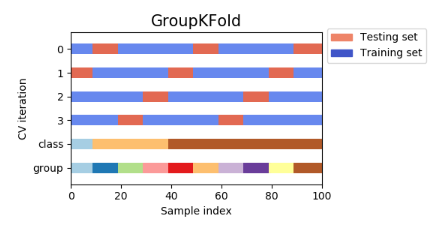

In [9]:
from IPython.display import Image
Image("visualization of group cv.PNG")

LeaveOneGroupOut() is a cross-validation scheme which holds out the samples according to a third-party provided array of integer groups. This group information can be used to encode arbitrary domain specific pre-defined cross-validation folds. Each training set is thus constituted by all the samples except the ones related to a specific group.

For example, in the cases of multiple experiments, LeaveOneGroupOut() can be used to create a CV based on the different experiments: we create a training set using the samples of all the experiments except one:

In [10]:
X = [1, 5, 10, 50, 60, 70, 80]
y = [0.65, 1.95, 2.39, 2.56, -0.75, 0.07, -4.56]
groups = [1, 1, 2, 2, 3, 3, 3]
logo = LeaveOneGroupOut()
for train, test in logo.split(X,y,groups=groups):
    print('Indices for Training Data: ', train)
    print('Indices for Test Data: ', test)

Indices for Training Data:  [2 3 4 5 6]
Indices for Test Data:  [0 1]
Indices for Training Data:  [0 1 4 5 6]
Indices for Test Data:  [2 3]
Indices for Training Data:  [0 1 2 3]
Indices for Test Data:  [4 5 6]


LeavePGroupsOut() is similar as LeaveOneGroupOut(), but removes samples related to P groups for each training/test set. Similarly, the GroupShuffleSplit() iterator behaves as a combination of ShuffleSplit() and LeavePGroupsOut(), and generates a sequence of randomized partitions in which a subset of groups are held out for each split. Below is an example:

In [11]:
X = np.arange(6)
y = [1, 1, 1, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3]
print(X,y)
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X,y,groups=groups):
    print('Indices for Training Data: ', train)
    print('Indices for Test Data: ', test)

[0 1 2 3 4 5] [1, 1, 1, 2, 2, 2]
Indices for Training Data:  [4 5]
Indices for Test Data:  [0 1 2 3]
Indices for Training Data:  [2 3]
Indices for Test Data:  [0 1 4 5]
Indices for Training Data:  [0 1]
Indices for Test Data:  [2 3 4 5]


Time series data is characterized by the correlation between observations that are near in time (autocorrelation). However, classical cross-validation techniques such as KFold() and ShuffleSplit() assume the samples are independent and identically distributed, and would result in unreasonable correlation between training and testing instances (yielding poor estimates of generalization error) on time series data. Therefore, it is very important to evaluate our model for time series data on the future observations least like those that are used to train the model. To achieve this, one solution is provided by TimeSeriesSplit(). TimeSeriesSplit() is a variation of K-fold CV which returns first K folds as train set and the (K+1)th fold as the test set. Note that unlike standard CV methods, successive training sets are supersets of those that come before them. Also, it adds all surplus data to the first training partition, which is always used to train the model. This class can be used to cross-validate time series data samples that are observed at fixed time intervals.

In [12]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
print('X:\n', X)
print('y:\n', y)
tscv = TimeSeriesSplit(n_splits=3)  
print('-----------------')
for train, test in tscv.split(X,y):
    print('Indices for Training Data: ', train)
    print('Indices for Test Data: ', test)

X:
 [[1 2]
 [3 4]
 [1 2]
 [3 4]
 [1 2]
 [3 4]]
y:
 [1 2 3 4 5 6]
-----------------
Indices for Training Data:  [0 1 2]
Indices for Test Data:  [3]
Indices for Training Data:  [0 1 2 3]
Indices for Test Data:  [4]
Indices for Training Data:  [0 1 2 3 4]
Indices for Test Data:  [5]


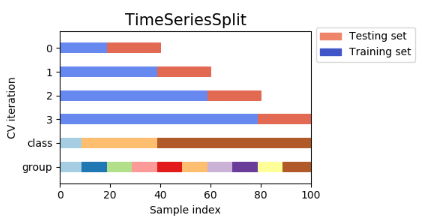

In [13]:
from IPython.display import Image
Image("TS_CV.PNG")

References:
   - http://scikit-learn.org/stable/modules/cross_validation.html